# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | poronaysk
Processing Record 6 of Set 1 | zhongshu
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | sinabang
Processing Record 12 of Set 1 | lima
Processing Record 13 of Set 1 | san ignacio
Processing Record 14 of Set 1 | tamanrasset
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | remire-montjoly
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | mandan
Processing Record 20 of Set 1 | kapa'a
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | vorgashor
Processing

Processing Record 42 of Set 4 | badagry
Processing Record 43 of Set 4 | kailua-kona
Processing Record 44 of Set 4 | la'ie
Processing Record 45 of Set 4 | port saint john's
Processing Record 46 of Set 4 | san pedro pochutla
Processing Record 47 of Set 4 | tanumah
Processing Record 48 of Set 4 | petropavlovsk-kamchatsky
Processing Record 49 of Set 4 | labasa
Processing Record 0 of Set 5 | mmabatho
Processing Record 1 of Set 5 | lamu
Processing Record 2 of Set 5 | kimbe
Processing Record 3 of Set 5 | selenice
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | bokhan
Processing Record 6 of Set 5 | piacabucu
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | morehead city
Processing Record 9 of Set 5 | suzhou
Processing Record 10 of Set 5 | puerto quijarro
Processing Record 11 of Set 5 | whyalla stuart
City not found. Skipping...
Processing Record 12 of Set 5 | santana
Processing Record 13 of Set 5 | maintirano
Processing Record 14 of Set 5 | chivh

Processing Record 36 of Set 8 | elko
Processing Record 37 of Set 8 | inekar
City not found. Skipping...
Processing Record 38 of Set 8 | balaipungut
Processing Record 39 of Set 8 | nantucket
Processing Record 40 of Set 8 | grand gaube
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | filadelfia
Processing Record 43 of Set 8 | tidjikja
Processing Record 44 of Set 8 | castillos
Processing Record 45 of Set 8 | blenheim
Processing Record 46 of Set 8 | moyobamba
Processing Record 47 of Set 8 | lillehammer
Processing Record 48 of Set 8 | amparafaravola
Processing Record 49 of Set 8 | farafangana
Processing Record 0 of Set 9 | bondo
Processing Record 1 of Set 9 | krasnokamsk
Processing Record 2 of Set 9 | buckeye
Processing Record 3 of Set 9 | berdigestyakh
Processing Record 4 of Set 9 | cururupu
Processing Record 5 of Set 9 | natal
Processing Record 6 of Set 9 | kolpny
Processing Record 7 of Set 9 | darab
Processing Record 8 of Set 9 | nizhneudinsk
Processing Record 9 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.90,69,100,8.47,SH,1686015516
1,blackmans bay,-43.0167,147.3167,14.29,79,81,4.41,AU,1686015516
2,port alfred,-33.5906,26.8910,13.39,67,100,3.63,ZA,1686015145
3,adamstown,-25.0660,-130.1015,21.04,63,89,9.21,PN,1686015516
4,poronaysk,49.2167,143.1167,13.39,63,10,4.30,RU,1686015517


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.90,69,100,8.47,SH,1686015516
1,blackmans bay,-43.0167,147.3167,14.29,79,81,4.41,AU,1686015516
2,port alfred,-33.5906,26.8910,13.39,67,100,3.63,ZA,1686015145
3,adamstown,-25.0660,-130.1015,21.04,63,89,9.21,PN,1686015516
4,poronaysk,49.2167,143.1167,13.39,63,10,4.30,RU,1686015517


In [8]:
#Remove null values
city_data_df = city_data_df.dropna()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 550
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        547 non-null    object 
 1   Lat         547 non-null    float64
 2   Lng         547 non-null    float64
 3   Max Temp    547 non-null    float64
 4   Humidity    547 non-null    int64  
 5   Cloudiness  547 non-null    int64  
 6   Wind Speed  547 non-null    float64
 7   Country     547 non-null    object 
 8   Date        547 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 42.7+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

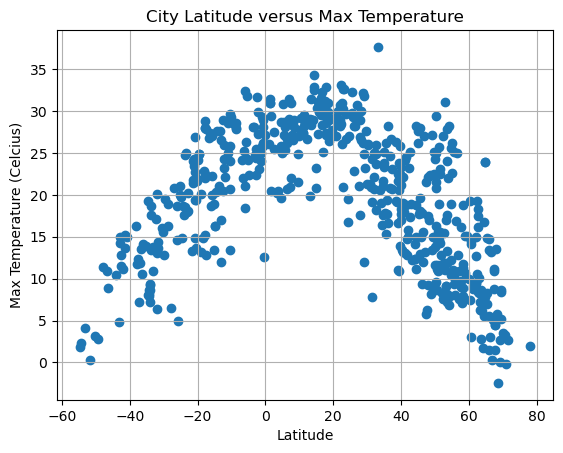

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude versus Max Temperature')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

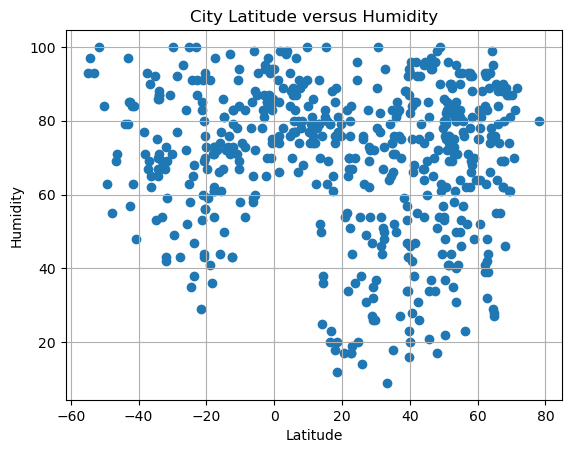

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude versus Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

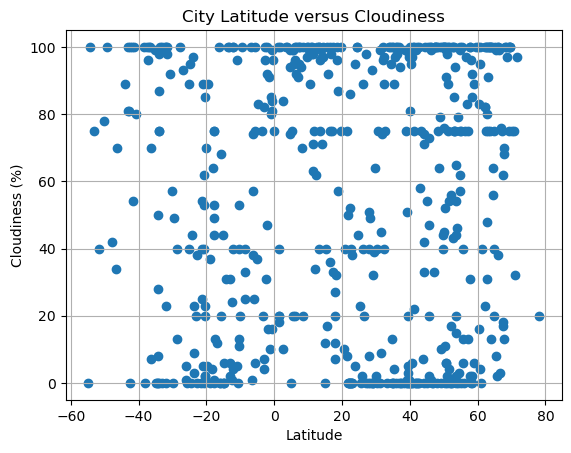

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude versus Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

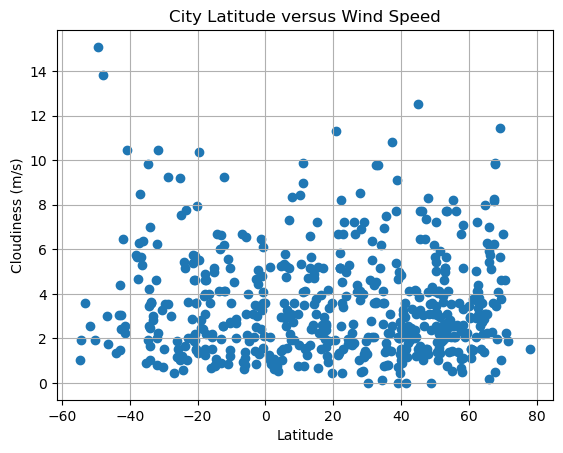

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude versus Wind Speed')
plt.ylabel('Cloudiness (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regressfunction (hemi_param, weather_param):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemi_param, weather_param)
    line_plot = hemi_param * slope + intercept
    line_annotate = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_value = f"The r-value is: {round(rvalue,2)}"
    return line_plot, line_annotate, r_value

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,poronaysk,49.2167,143.1167,13.39,63,10,4.30,RU,1686015517
5,zhongshu,24.5167,103.7667,16.76,96,100,1.95,CN,1686015517
7,tiksi,71.6872,128.8694,2.71,89,97,1.86,RU,1686015517
10,sinabang,2.4803,96.3801,27.57,78,84,0.62,ID,1686015517
12,san ignacio,17.1561,-89.0714,25.08,88,75,5.14,BZ,1686015232


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.90,69,100,8.47,SH,1686015516
1,blackmans bay,-43.0167,147.3167,14.29,79,81,4.41,AU,1686015516
2,port alfred,-33.5906,26.8910,13.39,67,100,3.63,ZA,1686015145
3,adamstown,-25.0660,-130.1015,21.04,63,89,9.21,PN,1686015516
6,waitangi,-43.9535,-176.5597,10.46,79,89,1.34,NZ,1686015517


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.78


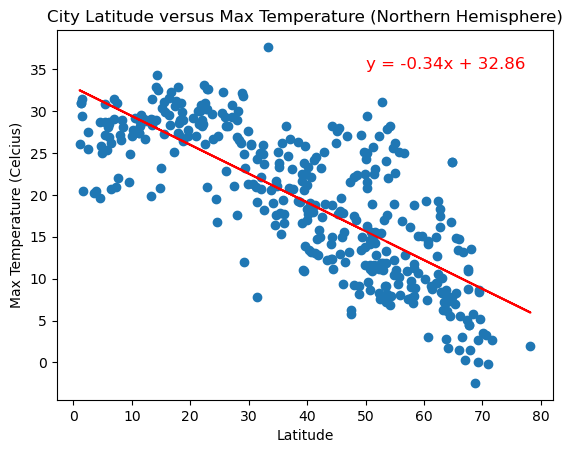

In [16]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[1],(50,35),fontsize=12,color='r')
plt.title('City Latitude versus Max Temperature (Northern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[2])
plt.show()


The r-value is: 0.8


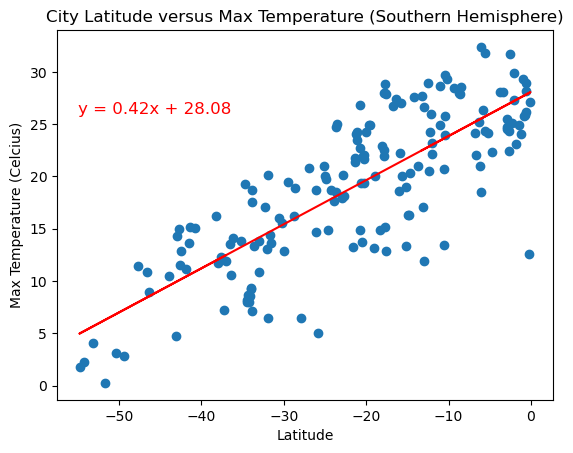

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[1],(-55, 26),fontsize=12,color='r')
plt.title('City Latitude versus Max Temperature (Southern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[2])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.01


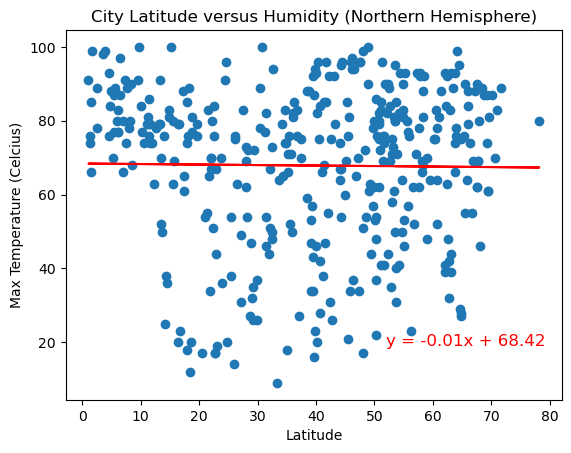

In [18]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[1],(52, 19),fontsize=12,color='r')
plt.title('City Latitude versus Humidity (Northern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[2])
plt.show()

The r-value is: 0.06


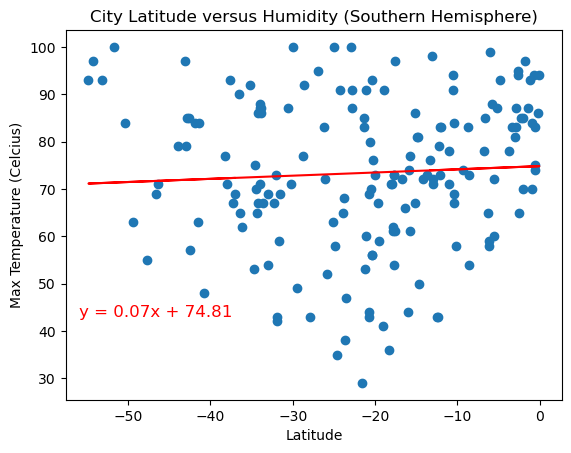

In [19]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[1],(-56, 43),fontsize=12,color='r')
plt.title('City Latitude versus Humidity (Southern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[2])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03


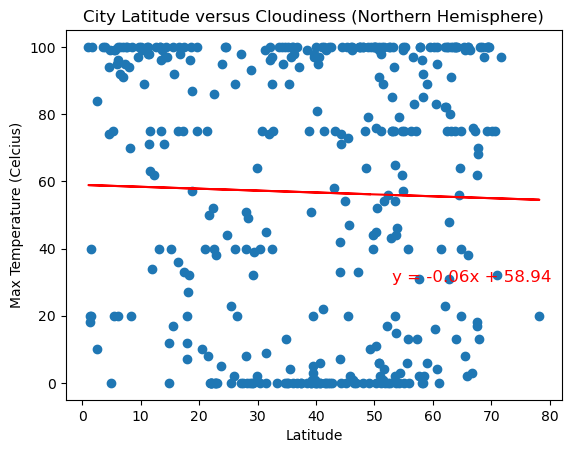

In [20]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[1],(53, 30),fontsize=12,color='r')
plt.title('City Latitude versus Cloudiness (Northern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[2])
plt.show()

The r-value is: -0.11


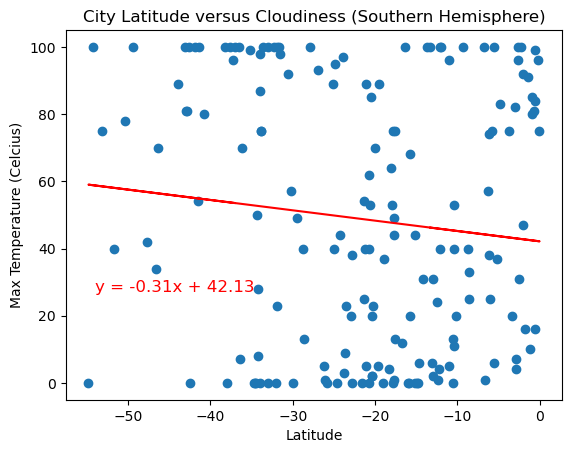

In [21]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[1],(-54, 27),fontsize=12,color='r')
plt.title('City Latitude versus Cloudiness (Southern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[2])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05


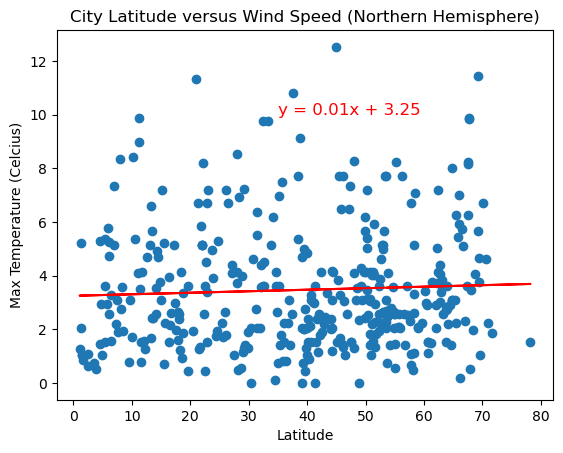

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[1],(35, 10),fontsize=12,color='r')
plt.title('City Latitude versus Wind Speed (Northern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[2])
plt.show()

The r-value is: -0.16


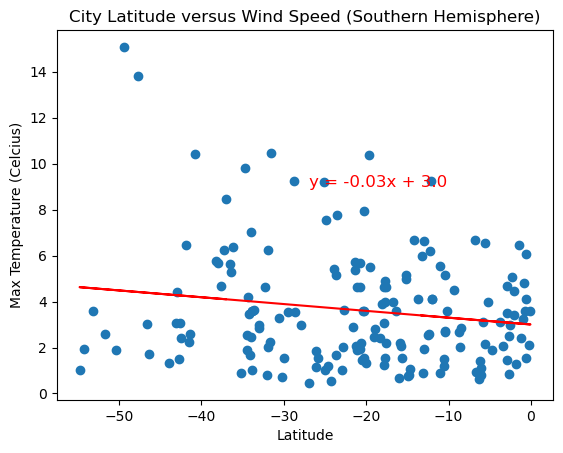

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[1],(-27, 9),fontsize=12,color='r')
plt.title('City Latitude versus Wind Speed (Southern Hemisphere)')
plt.ylabel('Max Temperature (Celcius)')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[2])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE